# Clustering grocery items

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('ggplot')

In [2]:
# read data
items = pd.read_csv("item_to_id.csv", index_col='Item_id')
purchase_history = pd.read_csv("purchase_history.csv")

In [3]:
def item_counts_by_user(same_user_df):
    # 'sum' here is adding two lists into one big list
    all_item_ids = same_user_df['id'].str.split(',').sum()
    # transform from string to int, make it easier to be sorted later
    return pd.Series(Counter(int(id) for id in all_item_ids))

In [4]:
from collections import Counter
user_item_counts = purchase_history.groupby("user_id").apply(item_counts_by_user).unstack(fill_value=0)

In [5]:
# each row in user_item_counts represents one user
# each column in user_item_counts represents one item
# [u,i] holds the number which user 'u' boughts item 'i'
user_item_counts.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
866557,1,1,0,0,0,0,0,0,2,0,...,0,0,1,0,1,0,0,0,0,0
435096,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16425,0,1,0,1,1,2,0,1,1,0,...,0,0,0,0,1,0,0,1,1,0
1481136,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
1275389,0,0,1,0,0,0,0,0,1,1,...,0,0,2,1,1,1,1,1,0,1


In [6]:
user_item_counts.sum(axis = 1).sort_values(ascending = False).head(1)

user_id
269335    72
dtype: int64

User_id 269335 bought most items - 72 items within his/her lifetime.

In [7]:
max_user_byitem = user_item_counts.apply(lambda s: pd.Series([s.argmax(), s.max()], index=["max_user", "max_count"]))
max_user_byitem = max_user_byitem.transpose()
max_user_byitem.index.name = "Item_id"

In [8]:
max_user_byitem

,max_user,max_count
Item_id,,
1,31625,4
2,31625,5
3,154960,4
4,5289,3
5,217277,3
6,334664,4
7,175865,3
8,151926,3
9,269335,4


In [9]:
max_user_byitem = max_user_byitem.join(items).loc[:, ["Item_name", "max_user", "max_count"]]
max_user_byitem

,Item_name,max_user,max_count
Item_id,,,
1,sugar,31625,4
2,lettuce,31625,5
3,pet items,154960,4
4,baby items,5289,3
5,waffles,217277,3
6,poultry,334664,4
7,sandwich bags,175865,3
8,butter,151926,3
9,soda,269335,4


In [10]:
df = user_item_counts.T.join(items).reset_index().set_index( ['Item_name'])

In [11]:
del df['Item_id']

In [12]:
df

,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
Item_name,,,,,,,,,,,,,,,,,,,,,
sugar,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
lettuce,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
pet items,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
baby items,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
waffles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
poultry,0,1,0,0,1,0,1,0,0,0,...,0,1,1,1,0,0,1,1,1,0
sandwich bags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
butter,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
soda,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
#cosine distance
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
item_similarity = 1 - pairwise_distances( df.as_matrix(), metric="cosine" )
#np.fill_diagonal( item_similarity, 1 ) 
simi_matrix = pd.DataFrame( item_similarity )
simi_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
1,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
2,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
3,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
4,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# choose best K (i.e., number of clusters)
inertias = []
silhouettes = []

ks = range(2,30)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(simi_matrix)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(simi_matrix, kmeans.predict(simi_matrix)))

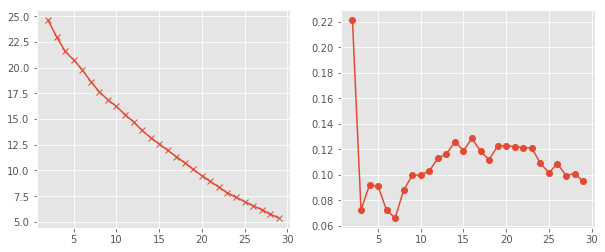

In [23]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(1,2,1)
plt.plot(ks,inertias,marker='x')# want to use elbow method to find best k

fig.add_subplot(1,2,2)
plt.plot(ks,silhouettes,marker='o')# the higher the better

In [26]:
d = items.to_dict()

In [27]:
num_clusters = 15
Km = KMeans(n_clusters=num_clusters,max_iter=1000)
Km.fit(simi_matrix)

clusters = []
for i in xrange(num_clusters):
    clusters.append([])

for i in xrange(48):
    l = Km.labels_[i]
    clusters[l].append(d['Item_name'][i+1])

In [29]:
for i in xrange(15):
    print "Cluster #{0}:{1}".format(i+1, clusters[i])

Cluster #1:['grapefruit', 'cherries', 'apples', 'berries', 'bananas']
Cluster #2:['sandwich bags', 'aluminum foil', 'paper towels', 'toilet paper']
Cluster #3:['shampoo']
Cluster #4:['poultry', 'beef', 'pork']
Cluster #5:['sugar', 'pet items', 'soda', 'tea', 'juice', 'coffee']
Cluster #6:['baby items']
Cluster #7:['butter', 'eggs', 'milk', 'cheeses', 'yogurt']
Cluster #8:['lettuce', 'carrots', 'cucumbers', 'broccoli', 'cauliflower']
Cluster #9:['cereals']
Cluster #10:['spaghetti sauce', 'canned vegetables', 'ketchup']
Cluster #11:['shaving cream', 'hand soap', 'soap']
Cluster #12:['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
Cluster #13:['waffles', 'flour', 'pasta']
Cluster #14:['laundry detergent', 'dishwashing\xc2\xa0']
Cluster #15:['frozen vegetables', 'ice cream']
